<a href="https://colab.research.google.com/github/jasonhadiputra/wisconsin-breast-cancer/blob/master/Wisconsin_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 4.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/Learn/Projects/4082AK Generalized Linear Models"

/content/drive/MyDrive/Learn/Projects/4082AK Generalized Linear Models


# Importing

In [6]:
df = pd.read_csv('./data.csv')

df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.set_index('id', inplace=True)

# df.iloc[:,:4].sample(5, random_state=42)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# One-hot Encoding

In [7]:
df = pd.read_csv('./data.csv')

df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.set_index('id', inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# df.loc[df.iloc[:,:4].sample(5, random_state=42).index].iloc[:,:4].to_latex()
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Modeling

## Stepwise

In [ ]:
def _forward_aic(target, featured_features, unfeatured_features, df):
    # Find initial AIC
    featured_api = [f"Q('{feature}')" for feature in featured_features]
    try:
        init_aic = smf.logit(f"{target} ~ {' + '.join(featured_api)}",
                             data=df).fit(disp=False).aic
    except:
        init_aic = smf.logit(f"{target} ~ 1",
                             data=df).fit(disp=False).aic

    print(f"Forward init_aic: {init_aic}")
    # Try adding each of the unfeatured_features
    aic_list = []
    for tried_feature in unfeatured_features:
        tried_api = f"Q('{tried_feature}')"
        model = smf.logit(f"{target} ~ {' + '.join(featured_api)} + {tried_api}",
                    data=df).fit(disp=False)
        # List all the AIC
        print(f"AIC={round(model.aic,3)}, added {tried_feature}")
        aic_list.append(model.aic)
    print()
    # If the new AIC is lower, return the index of feature to add
    imin = np.argmin(aic_list)
    if init_aic > aic_list[imin]:
        return imin
    return 'no index'

def _backward_aic(target, featured_features, df):
    # Find initial AIC
    featured_api = [f"Q('{feature}')" for feature in featured_features]
    try:
        init_aic = smf.logit(f"{target} ~ {' + '.join(featured_api)}",
                             data=df).fit(disp=False).aic
    except:
        init_aic = smf.logit(f"{target} ~ 1",
                             data=df).fit(disp=False).aic

    print(f"Backward init_aic: {init_aic}")
    # Try dropping each of the featured_features
    aic_list = []
    n_features = len(featured_features)
    for i in range(n_features):
        left_features = [featured_features[j] for j in range(n_features) if j != i]
        left_api = [f"Q('{feature}')" for feature in left_features]
        try:
            model = smf.logit(f"{target} ~ {' + '.join(left_api)}",
                              data=df).fit(disp=False)
        except:
            model = smf.logit(f"{target} ~ 1",
                              data=df).fit(disp=False)
                              
        # List all the AIC
        print(f"AIC={round(model.aic,3)}, dropped {featured_features[i]}")
        aic_list.append(model.aic)
    print()
    # If the new AIC is lower, return the index of feature to drop
    imin = np.argmin(aic_list)
    if init_aic > aic_list[imin]:
        return imin
    return 'no index'

In [ ]:
target = 'diagnosis'
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Breaking condition, if no set of featured features changes
different_set = True
featured_features = []
unfeatured_features = features.copy()

while different_set:
    different_set = False

    # Forward selection
    temp_i = _forward_aic(target, featured_features, unfeatured_features, df)
    if temp_i != 'no index':
        featured_features.append(unfeatured_features.pop(temp_i))
        different_set = True

    # Backward elimination
    temp_i = _backward_aic(target, featured_features, df)

    if temp_i != 'no index':
        unfeatured_features.append(featured_features.pop(temp_i))
        different_set = True

featured_features

## Without split

In [ ]:
target = 'diagnosis'

features = ['smoothness_worst',
 'texture_worst',
 'symmetry_worst',
 'compactness_se',
 'concavity_mean',
 'texture_se',
 'area_se',
 'concave points_worst',
 'area_worst']

formula_api = [f"Q('{feature}')" for feature in features]

model = smf.logit(f"{target} ~ {' + '.join(formula_api)}",
                data=df).fit(disp=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                            9
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.9293
Time:                        09:58:55   Log-Likelihood:                -26.548
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.571e-144
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -44.3757      8.931     -4.969      0.000     -61.880     -26.871
Q('smoothness_worst')        65.5417     30.007      2.184      0.029       6.729     124.354
Q('texture_worst')            0.5412      0.134      4.031      0.000       0.278       0.804
Q('symmetry_worst')          15.6127      7.473      2.089      0.037       0.966      30.259
Q('compactness_se')        -116.5703     36.229     -3.218      0.001    -187.578     -45.563
Q('concavity_mean')          37.3743     14.197      2.632      0.008       9.548      65.201
Q('texture_se')              -2.6112      1.472     -1.774      0.076      -5.496       0.274
Q('area_se')                  0.2265      0.068      3.309      0.001       0.092       0.361
Q('concave points_worst')    39.1800     19.514      2.008      0.045       0.934      77.426
Q('area_worst')               0.0096      0.003      2.771      0.006       0.003       0.016
=============================================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
model.aic

73.09695681721016

0.6754665480564337


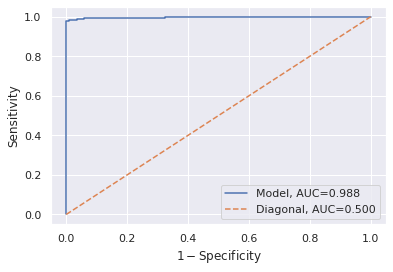

In [ ]:
y_true = df[target]

y_hat = model.predict(df[features])

fpr, tpr, thresholds = roc_curve(y_true, y_hat)

# Find threshold
imax = np.argmax(tpr-fpr)
threshold = thresholds[imax]
print(threshold)
y_pred = y_hat.apply(lambda p: 0 if p < threshold else 1)

# plt.figure(figsize=(8, 6), dpi=256)
plt.plot(fpr,tpr,           label=f"Model, AUC={round(roc_auc_score(y_true, y_pred),3)}")
plt.plot([0,1],[0,1], '--', label=f"Diagonal, AUC=0.500")
plt.ylabel('Sensitivity')
plt.xlabel('$1-$Specificity')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix : \n", cm)
print()

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_true, y_pred))
print(tpr[imax])
print(1-fpr[imax])

Confusion Matrix : 
 [[357   0]
 [  5 207]]

Test accuracy =  0.9912126537785588
0.9764150943396226
1.0


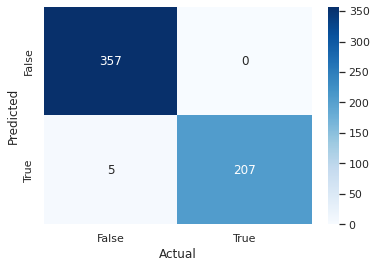

In [ ]:
# plt.figure(figsize=(8, 6), dpi=256)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Archived

## Feature Selection

In [ ]:
VIF_CUTOFF = 30

features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# drop = ['symmetry_se', 'texture_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'symmetry_worst', 'symmetry_mean']
drop = []

features = [feature for feature in features if feature not in drop]

while True:
    # the independent variables set
    X = df[features]
    
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    # break if max VIF < VIF_CUTOFF
    imax = np.argmax(vif_data['VIF'])
    if vif_data.loc[imax, 'VIF'] < VIF_CUTOFF:
        break
    
    drop.append(vif_data.loc[imax, 'feature'])
    features.remove(drop[-1])

vif_data

In [ ]:
features = ['smoothness_worst',
 'texture_worst',
 'symmetry_worst',
 'compactness_se',
 'concavity_mean',
 'texture_se',
 'area_se',
 'concave points_worst',
 'area_worst']

# the independent variables set
X = df[features]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

vif_data

,feature,VIF
0,smoothness_worst,36.097224
1,texture_worst,32.962592
2,symmetry_worst,31.627463
3,compactness_se,7.029358
4,concavity_mean,15.105900
5,texture_se,10.664589
6,area_se,7.430798
7,concave points_worst,31.113997
8,area_worst,22.525096


## Modelling With split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
target = 'diagnosis'
features = ['smoothness_worst',
 'texture_worst',
 'symmetry_worst',
 'compactness_se',
 'concavity_mean',
 'texture_se',
 'area_se',
 'concave points_worst',
 'area_worst']

formula_api = [f"Q('{feature}')" for feature in features]

model = smf.logit(f"{target} ~ {' + '.join(formula_api)}",
                data=df_train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.051703
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            9
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.9218
Time:                        08:47:28   Log-Likelihood:                -20.578
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 8.500e-99
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -43.7873     10.341     -4.235      0.000     -64.054     -23.520
Q('smoothness_worst')        57.3896     33.353      1.721      0.085      -7.981     122.760
Q('texture_worst')            0.5941      0.161      3.687      0.000       0.278       0.910
Q('symmetry_worst')          18.5041      8.896      2.080      0.038       1.069      35.940
Q('compactness_se')        -121.4504     42.265     -2.874      0.004    -204.287     -38.613
Q('concavity_mean')          38.3034     15.057      2.544      0.011       8.791      67.816
Q('texture_se')              -2.7568      1.664     -1.657      0.098      -6.017       0.504
Q('area_se')                  0.2450      0.091      2.682      0.007       0.066       0.424
Q('concave points_worst')    34.3721     20.969      1.639      0.101      -6.726      75.470
Q('area_worst')               0.0078      0.004      2.013      0.044       0.000       0.015
=============================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
model.aic

61.1553029412165

In [ ]:
y_true = df_test[target]

y_hat = model.predict(df_test[features])
y_pred = list(map(round, y_hat))

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix : \n", cm)
print()

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_true, y_pred))

Confusion Matrix : 
 [[107   1]
 [  1  62]]

Test accuracy =  0.9883040935672515


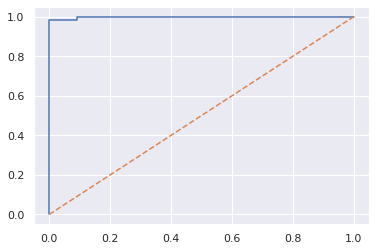

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_hat)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], '--')
plt.show()